In [138]:
! pip install yfinance
import yfinance as yf
from datetime import datetime 

# Define the stock symbol and start date for data collection
symbol= 'TSLA'
start_date = datetime(2018, 1, 1)

# Download data from YahooFinance API for the given stock symbol and start date
df = yf.download(symbol, start=start_date)


# Save the downloaded data to a CSV file
df.to_csv('TSLA.csv')

# Read the saved CSV file into a Pandas DataFrame for further analysis
hist=pd.read_csv('TSLA.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed


In [139]:
hist.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1315,2023-03-24,191.649994,192.360001,187.149994,190.410004,190.410004,116312400
1316,2023-03-27,194.419998,197.389999,189.940002,191.809998,191.809998,120851600
1317,2023-03-28,192.000000,192.350006,185.429993,189.190002,189.190002,98654600
1318,2023-03-29,193.130005,195.289993,189.440002,193.880005,193.880005,123660000
1319,2023-03-30,195.580002,197.330002,194.419998,195.279999,195.279999,110012000


In [140]:
hist.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [141]:
hist = hist[['Date', 'Close']].copy()
hist = hist.rename({'Date': 'ds', 'Close': 'y'}, axis='columns')
hist.tail()

,ds,y
1315,2023-03-24,190.410004
1316,2023-03-27,191.809998
1317,2023-03-28,189.190002
1318,2023-03-29,193.880005
1319,2023-03-30,195.279999


In [142]:
import plotly.express as px

fig = px.line(hist, x='ds', y='y', title='Stock Price change over time')
fig.show()

In [143]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [144]:
from prophet import Prophet
m = Prophet()

In [145]:
m = Prophet()

In [146]:
m.fit(hist)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprnqwkatf/q8uliaei.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprnqwkatf/mwt4f5x5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6866', 'data', 'file=/tmp/tmprnqwkatf/q8uliaei.json', 'init=/tmp/tmprnqwkatf/mwt4f5x5.json', 'output', 'file=/tmp/tmprnqwkatf/prophet_modelanhjed1i/prophet_model-20230331052907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:29:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:29:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [147]:
import pandas as pd
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
pd.options.display.max_columns = None
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1345,2023-04-25,140.350021,113.199263,178.305430,140.089659,140.485077,3.783065,3.783065,3.783065,-0.190833,-0.190833,-0.190833,3.973898,3.973898,3.973898,0.0,0.0,0.0,144.133086
1346,2023-04-26,139.928419,111.545106,174.881050,139.621861,140.100911,3.427057,3.427057,3.427057,0.047553,0.047553,0.047553,3.379504,3.379504,3.379504,0.0,0.0,0.0,143.355476
1347,2023-04-27,139.506817,111.002239,177.124281,139.185193,139.734180,2.264117,2.264117,2.264117,-0.424256,-0.424256,-0.424256,2.688373,2.688373,2.688373,0.0,0.0,0.0,141.770934
1348,2023-04-28,139.085215,105.980398,172.666874,138.697641,139.346473,0.818050,0.818050,0.818050,-1.078025,-1.078025,-1.078025,1.896075,1.896075,1.896075,0.0,0.0,0.0,139.903265
1349,2023-04-29,138.663613,104.531155,172.120417,138.251473,138.993469,1.412185,1.412185,1.412185,0.411683,0.411683,0.411683,1.000502,1.000502,1.000502,0.0,0.0,0.0,140.075798


In [148]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1345,2023-04-25,144.133086,113.199263,178.305430
1346,2023-04-26,143.355476,111.545106,174.881050
1347,2023-04-27,141.770934,111.002239,177.124281
1348,2023-04-28,139.903265,105.980398,172.666874
1349,2023-04-29,140.075798,104.531155,172.120417


In [157]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-02,25.313765
1,2018-01-03,26.504769
2,2018-01-04,26.958383
3,2018-01-05,27.184229
4,2018-01-08,31.292889
...,...,...
1345,2023-04-25,144.133086
1346,2023-04-26,143.355476
1347,2023-04-27,141.770934
1348,2023-04-28,139.903265


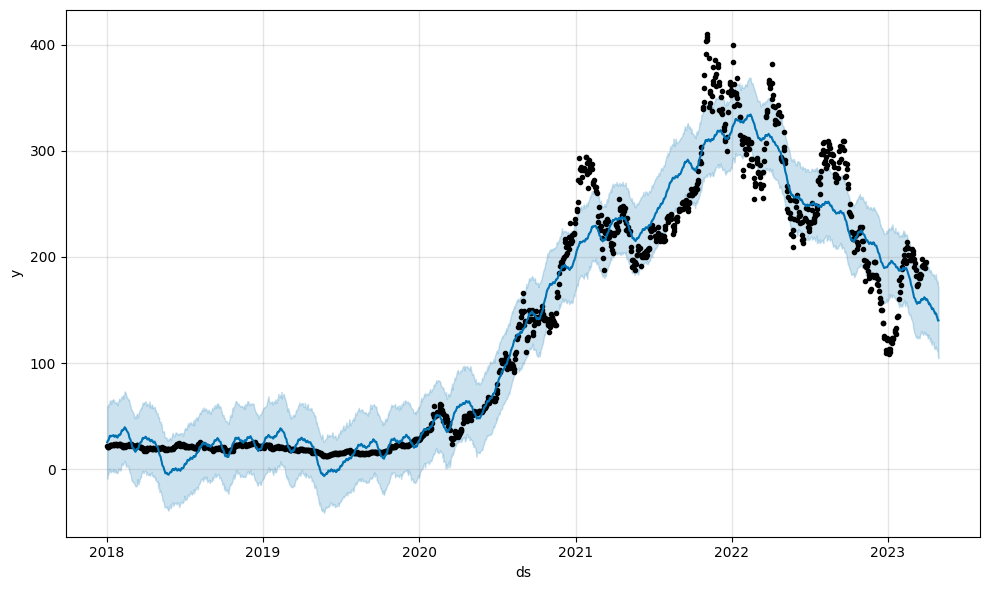

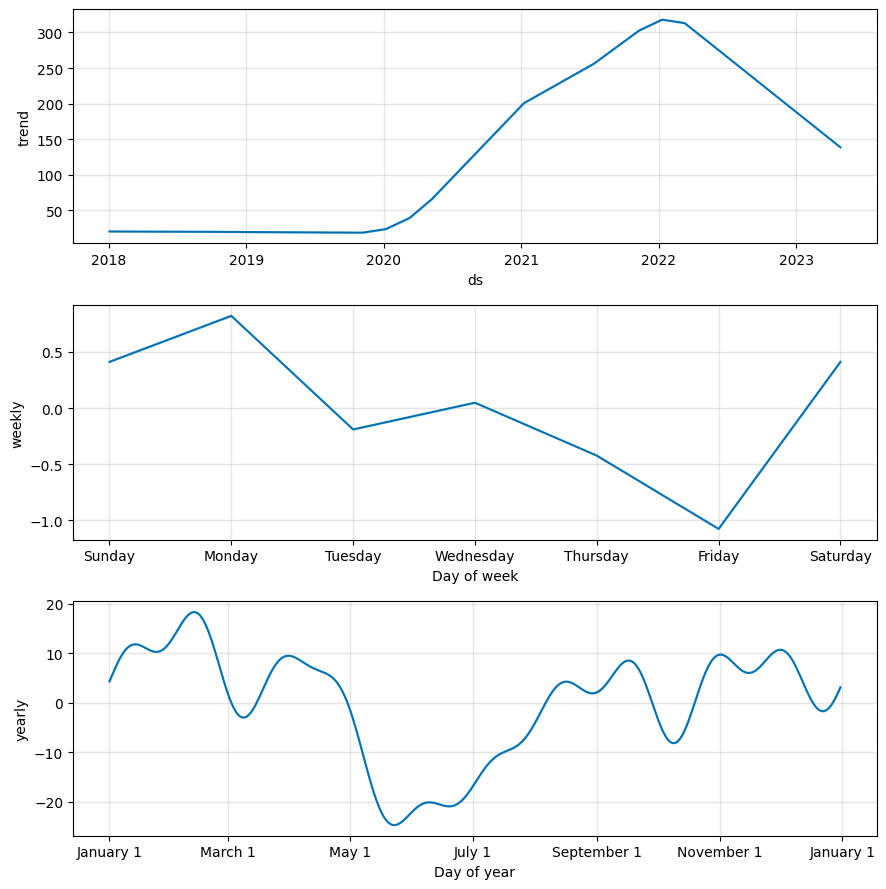

In [149]:
figure1 = m.plot(forecast)
figure2 = m.plot_components(forecast)

In [150]:
from prophet.plot import plot_plotly
plot_plotly(m, forecast)

# Cross Validaton

In order for us to find out how our model performs and know if we are making progress we need some kind of validation. Prophet includes functionality for time series cross validation to measure forecast error using historical data.

This cross validation procedure can be done automatically for a range of historical cutoffs using the `cross_validation` function. We specify,

`horizon` - the forecast horizon
`initial` - the size of the initial training period
`period `- the spacing between cutoff dates
By default, the initial training period is set to three times the horizon, and cutoffs (period) are made every half a horizon.

The resulting dataframe can now be used to compute error measures of yhat vs. y.

Here we do cross-validation to assess prediction performance on a horizon of 180 days, starting with 540 days of training data in the first cutoff and then making predictions every 31 days.

In [151]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='150 days', period='15 days', horizon = '50 days')

INFO:prophet:Making 115 forecasts with cutoffs between 2018-06-04 00:00:00 and 2023-02-08 00:00:00


  0%|          | 0/115 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprnqwkatf/hkh1vmr1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprnqwkatf/_s0dlqby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2240', 'data', 'file=/tmp/tmprnqwkatf/hkh1vmr1.json', 'init=/tmp/tmprnqwkatf/_s0dlqby.json', 'output', 'file=/tmp/tmprnqwkatf/prophet_model_f5dudu4/prophet_model-20230331052911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:29:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:29:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprnqwkatf/qi61bz64.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprnqwkatf/3b03060m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

# Performance Metrics

https://facebook.github.io/prophet/docs/diagnostics.html

Prophet comes with some built-in performance metrics, The performance metrics available are:

* `mse:` mean absolute error
* `rmse:` mean squared error
* `mae:` Mean average error
* `mape:` Mean average percentage error
* `mdape:` Median average percentage error
The code for validating and gathering performance metrics is shown below:

In [152]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,1096.157432,33.108268,21.346866,0.144101,0.112427,0.138734,0.289384
1,7 days,1042.904288,32.294029,20.865674,0.144316,0.116828,0.138937,0.284357
2,8 days,1008.986953,31.764555,20.669798,0.146762,0.117103,0.140667,0.277575
3,9 days,1036.197528,32.190022,21.121101,0.155553,0.123091,0.150483,0.270886
4,10 days,1112.995942,33.361594,21.814554,0.163121,0.114771,0.158120,0.272168


In [153]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
40,46 days,2456.768466,49.565799,33.281470,0.251359,0.210522,0.244715,0.167089
41,47 days,2550.950184,50.506932,34.096535,0.254403,0.212477,0.249848,0.159000
42,48 days,2726.520227,52.216092,35.402691,0.260013,0.213745,0.253990,0.149367
43,49 days,2949.955588,54.313494,36.761076,0.264336,0.221884,0.257590,0.151899
44,50 days,2987.995232,54.662558,37.056343,0.265452,0.228317,0.261767,0.155542


Cross validation performance metrics can be visualized with `plot_cross_validation_metric`, here shown for `RMSE`. 

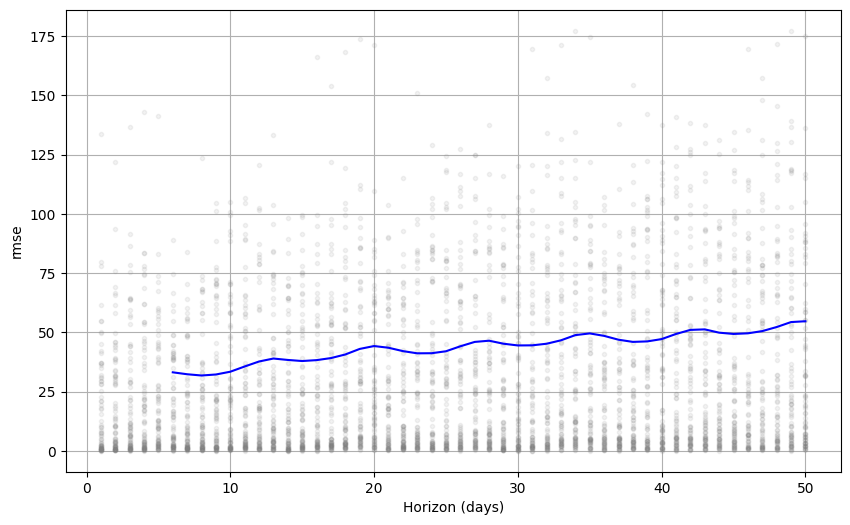

In [154]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [160]:
import json
from prophet.serialize import model_to_json, model_from_json

with open('stock_price.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

with open('stock_price.json', 'rb') as fin:
    m = model_from_json(json.load(fin))  # Load model


/usr/local/lib/python3.9/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')



In [163]:
new_pred_plot = pd.DataFrame({
    'dates': forecast['ds'],
    'predicted price':forecast['yhat']
})

In [164]:
new_pred_plot= new_pred_plot[-30:]
new_pred_plot

,dates,predicted price
1320,2023-03-31,159.281682
1321,2023-04-01,160.359288
1322,2023-04-02,159.875799
1323,2023-04-03,159.741497
1324,2023-04-04,158.133259
1325,2023-04-05,157.737397
1326,2023-04-06,156.603644
1327,2023-04-07,155.271117
1328,2023-04-08,156.075280
1329,2023-04-09,155.391737


In [165]:
jsonresult  = new_pred_plot.to_json(orient='records')

In [167]:
jsonresult

'[{"dates":1680220800000,"predicted price":159.2816822057},{"dates":1680307200000,"predicted price":160.3592883418},{"dates":1680393600000,"predicted price":159.8757988764},{"dates":1680480000000,"predicted price":159.7414969852},{"dates":1680566400000,"predicted price":158.1332585816},{"dates":1680652800000,"predicted price":157.7373970972},{"dates":1680739200000,"predicted price":156.6036435291},{"dates":1680825600000,"predicted price":155.2711173879},{"dates":1680912000000,"predicted price":156.0752799101},{"dates":1680998400000,"predicted price":155.3917371562},{"dates":1681084800000,"predicted price":155.1279464987},{"dates":1681171200000,"predicted price":153.455269571},{"dates":1681257600000,"predicted price":153.0520635273},{"dates":1681344000000,"predicted price":151.9579825462},{"dates":1681430400000,"predicted price":150.7003346207},{"dates":1681516800000,"predicted price":151.6014725403},{"dates":1681603200000,"predicted price":151.0230727355},{"dates":1681689600000,"predic

In [166]:
import json
with open('data.json', 'w') as f:
    json.dump(jsonresult, f)